In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from explore import print_metrics

In [2]:
df = pd.read_csv(r"C:\Users\meeta\OneDrive\Documents\py_projects\soccer_simple_reg\data\raw\EPL_Soccer_MLR_LR.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [3]:
df.corr(numeric_only=True)

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


#### Manually verifying Pearson's correlation coefficient for features score and cost

In [4]:
(((df["Score"] - df["Score"].mean()) * (df["Cost"]-df["Cost"].mean())).sum()/df.shape[0]) / ((df["Score"].std(ddof=0) * df["Cost"].std(ddof=0)))

np.float64(0.9630168489926474)

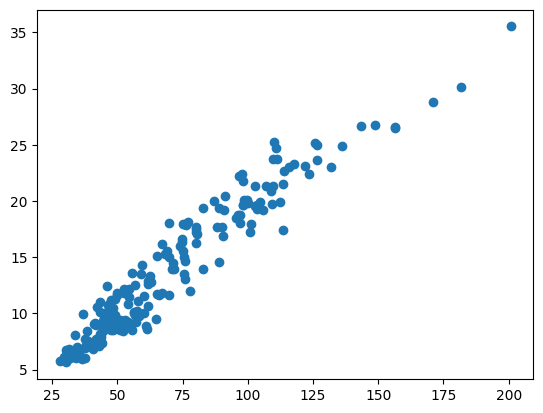

In [5]:
plt.scatter(df["Cost"], df["Score"])
plt.show()

In [6]:
x = df["Cost"]
y = df["Score"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=100)

In [7]:
lr = sm.OLS(y_train, x_train).fit()
lr.params

Cost    0.192891
dtype: float64

In [8]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Fri, 13 Dec 2024   Prob (F-statistic):                   3.84e-144
Time:                        19:43:36   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1929      0.002    108.014      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.054
Skew:                           0.021   Prob(JB):                        0.974
Kurtosis:                       3.083   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
test_df = pd.DataFrame({"Cost": x_train, "Score": y_train})
test_df

,Cost,Score
52,181.7,30.10
74,131.9,23.01
28,74.7,16.58
29,113.5,21.47
89,109.0,20.86
...,...,...
87,46.1,10.15
103,50.9,8.56
67,49.9,11.77
24,76.2,17.89


In [10]:
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.params

const    0.947185
Cost     0.182083
dtype: float64

In [11]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           6.91e-88
Time:                        19:43:36   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.004       0.305       1.589
Cost           0.1821      0.004     44.456      0.000       0.174       0.190
==============================================================================
Omnibus:                        3.849   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.867
Skew:                           0.359   Prob(JB):                        0.145
Kurtosis:                       2.685   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
print_metrics(df=test_df, regressors=["Cost"], label="Score")


Correlation between regressors and label: 
--------
Regressor: Cost
0.9643097125454517

Least square estimates: 
--------
Regressor: Cost
Slope estimate: 0.18208264626002543
Intercept estimate: 0.9471853461853161
Slope standard error: 0.004095801363176402
Intercept standard error: 0.32480986101528414

T-value for 95% confidence interval: 1.976013177679155
Slope margin of error: 0.008093357466792817
Interval: 0.1739892887932326 to 0.19017600372681825
t-statistic for slope: 44.45592696390324
p-value for slope: 0.0

Intercept margin of error: 0.6418285656063363
Interval: 0.30535678057897986 to 1.5890139117916524
t-statistic for intercept: 2.9161225069479824
p-value for intercept: 0.004092334272898901
151
